# Baseline Model

## Table of Contents
1. [Model Choice](#model-choice)
2. [Feature Selection](#feature-selection)
3. [Implementation](#implementation)
4. [Evaluation](#evaluation)


In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Model Choice

[I choose a simple neural network model. This should be the best for my numeric data.]


## Feature Selection

[The goal is to examine the structural change. It is assumed that this depends on the distribution of the sectors and on the age of the people. Since the sector values sum up to 100%, only two of them are needed; therefore, the third sector is deleted.]


In [ ]:
# Load the data for Germany and SH
df = pd.read_csv("../1_DatasetCharacteristics/ger_total.csv")
df_sh = pd.read_csv("../1_DatasetCharacteristics/sh_total.csv")

# Normalize delta values
max_delta = max(df['delta'].max(), df_sh['delta'].max())
df['delta'] = df['delta'] / max_delta
df_sh['delta'] = df_sh['delta'] / max_delta

max_sector = max(df['1. Sector'].max(), df['2. Sector'].max(), df_sh['1. Sector'].max(), df_sh['2. Sector'].max())
                    
df['1. Sector'] = df['1. Sector'] / max_sector  # Normalize sector values
df['2. Sector'] = df['2. Sector'] / max_sector  # Normalize sector values    
df_sh['1. Sector'] = df_sh['1. Sector'] / max_sector  # Normalize sector values
df_sh['2. Sector'] = df_sh['2. Sector'] / max_sector  # Normalize sector values    

max_age = max(df['age'].max(), df_sh['age'].max())
df['age'] = df['age'] / max_age
df_sh['age'] = df_sh['age'] / max_age



key_col = df.columns[0]

# Features and target
x = df[['1. Sector', '2. Sector', 'age']]
y = df['delta']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


## Implementation



In [3]:
# Normalize the input features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Linear output for regression
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(x_train_scaled, y_train, validation_split=0.20, epochs=300, verbose=0, callbacks=[early_stop])


## Evaluation

[For Evaluation I used MSE Loss and Mean Absolute Error.]


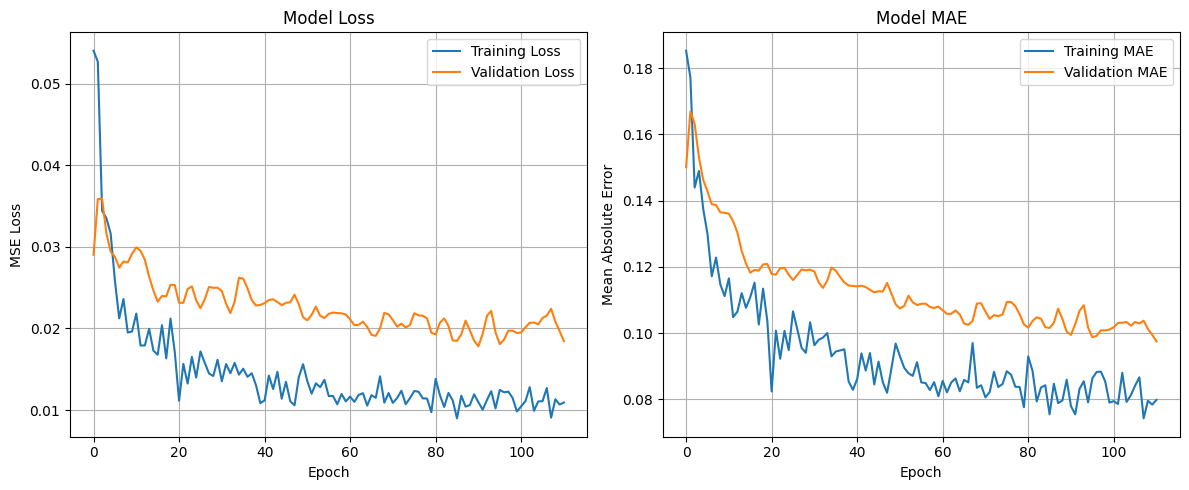

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0079 - mae: 0.0639
0.007747800555080175
0.0641040951013565
Final Test Loss: 0.0077
Final Test MAE:  0.0641
Final Validation Loss: 0.0184
Final Validation MAE:  0.0975
Final Training Loss: 0.0109
Final Training MAE:  0.0798
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


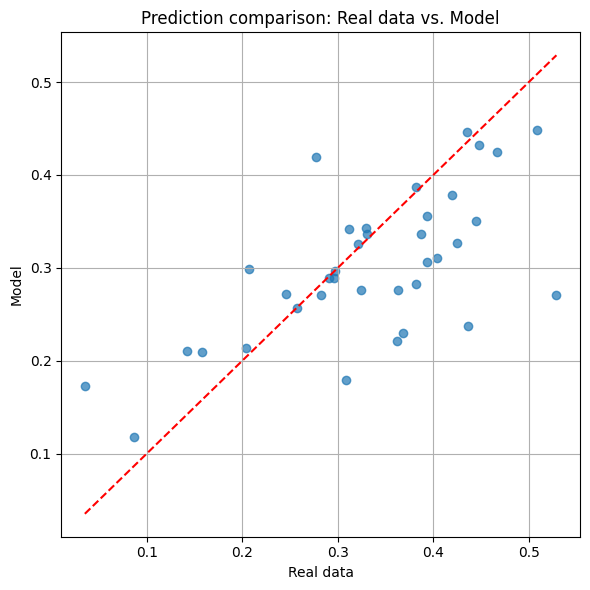

In [14]:
# Plot learning curves (Loss & MAE)
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_mae = model.evaluate(x_test_scaled, y_test)

print(test_loss)
print(test_mae)

print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test MAE:  {test_mae:.4f}")

val_loss = history.history['val_loss'][-1]
val_mae  = history.history['val_mae'][-1]

print(f"Final Validation Loss: {val_loss:.4f}")
print(f"Final Validation MAE:  {val_mae:.4f}")

train_loss = history.history['loss'][-1]
train_mae  = history.history['mae'][-1]

print(f"Final Training Loss: {train_loss:.4f}")
print(f"Final Training MAE:  {train_mae:.4f}")


# Predictions on the test dataset
y_pred = model.predict(x_test_scaled).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Real data')
plt.ylabel('Model')
plt.title('Prediction comparison: Real data vs. Model')
plt.grid(True)
plt.tight_layout()
plt.show()


